# Лабораторная работа №1

# Разведочный анализ данных. Исследование и визуализация данных.

Цель лабораторной работы: изучение различных методов визуализация данных.

Краткое описание. Построение основных графиков, входящих в этап разведочного анализа данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать набор данных Restaurant Business Rankings 2020 - 
https://www.kaggle.com/michau96/restaurant-business-rankings-2020

Эти данные можно использовать, чтобы посмотреть о том, каким был 2020 год для ресторанов, что было популярным, что может стать более популярным в ближайшее время.

Датасет состоит из трех файлов:
- Future50.csv - список под редакцией журнала, в который входят компании и бренды с самым высоким потенциалом роста в долгосрочной перспективе (в этом примере используется только данный файл)
- Independence100.csv
- Top250.csv

Файл Future50 содержит следующие колонки:
- Rank - позиция в рейтинге
- Restaurant - название ресторана
- Location - место происхождения ресторана
- Sales - продажи в 2019 г. млн долларов
- YOY_Sales - годовой прирост продаж в %
- Units - количество помещений
- YOY_Units - из года в год помещения увеличиваются в %
- Unit_Volume - cредний единичный объем 2019 года в тыс. долларов (AUV (средний объем единицы продукции) расчитывается путем деления общих продаж, осуществляемых компанией, на общее количество единиц, эксплуатируемых компанией)
- Franchising - является ли ресторан франшизой? (yes/no)

### Импорт библиотек

Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas.

Файлы имеют расширение CSV (https://ru.wikipedia.org/wiki/CSV). Часто в файлах такого формата в качестве разделителей используются символы ",", ";" или табуляция. Поэтому вызывая метод read_csv всегда стоит явно указывать разделитель данных с помощью параметра sep. Чтобы узнать какой разделитель используется в файле его рекомендуется предварительно посмотреть в любом текстовом редакторе.

In [2]:
# Будем анализировать данные файла Future50
data = pd.read_csv('data/Future50.csv', sep=",")

## 2) Основные характеристики датасета

In [3]:
# Первые 5 строк датасета
data.head()

,Rank,Restaurant,Location,Sales,YOY_Sales,Units,YOY_Units,Unit_Volume,Franchising
0,1,Evergreens,"Seattle, Wash.",24,130.5%,26,116.7%,1150,No
1,2,Clean Juice,"Charlotte, N.C.",44,121.9%,105,94.4%,560,Yes
2,3,Slapfish,"Huntington Beach, Calif.",21,81.0%,21,90.9%,1370,Yes
3,4,Clean Eatz,"Wilmington, N.C.",25,79.7%,46,58.6%,685,Yes
4,5,Pokeworks,"Irvine, Calif.",49,77.1%,50,56.3%,1210,Yes


In [4]:
# Размер датасета - 50 строк, 9 колонок
data.shape

(50, 9)

In [5]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 50


In [6]:
# Список колонок
data.columns

Index(['Rank', 'Restaurant', 'Location', 'Sales', 'YOY_Sales', 'Units',
       'YOY_Units', 'Unit_Volume', 'Franchising'],
      dtype='object')

In [7]:
# Список колонок с типами данных
data.dtypes

Rank            int64
Restaurant     object
Location       object
Sales           int64
YOY_Sales      object
Units           int64
YOY_Units      object
Unit_Volume     int64
Franchising    object
dtype: object

In [8]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

Rank - 0
Restaurant - 0
Location - 0
Sales - 0
YOY_Sales - 0
Units - 0
YOY_Units - 0
Unit_Volume - 0
Franchising - 0


In [9]:
# Основные статистические характеристки набора данных
data.describe()

,Rank,Sales,Units,Unit_Volume
count,50.00000,50.000000,50.000000,50.00000
mean,25.50000,33.780000,34.700000,1592.60000
std,14.57738,9.596534,24.527577,994.67677
min,1.00000,20.000000,7.000000,465.00000
25%,13.25000,24.250000,16.000000,867.50000
50%,25.50000,34.500000,27.000000,1260.00000
75%,37.75000,42.000000,45.500000,2020.00000
max,50.00000,49.000000,105.000000,4300.00000


In [10]:
# Определим уникальные значения
data['Franchising'].unique()

array(['No', 'Yes'], dtype=object)

Franchising содержит только значения 'No' и 'Yes'.

## 3) Визуальное исследование датасета 

Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### Диаграмма рассеяния 

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

<AxesSubplot:xlabel='Units', ylabel='Unit_Volume'>

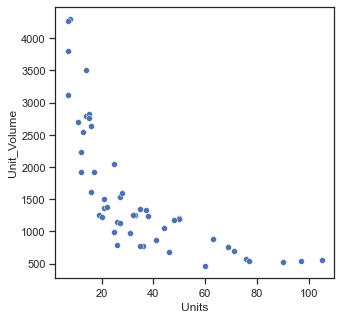

In [11]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='Units', y='Unit_Volume', data=data)

Посмотрим насколько на эту зависимость влияет Franchising.

<AxesSubplot:xlabel='Units', ylabel='Unit_Volume'>

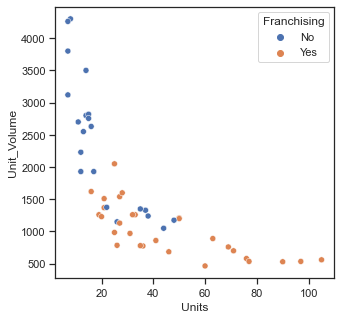

In [12]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x='Units', y='Unit_Volume', data=data, hue='Franchising')

### Гистограмма 

Позволяет оценить плотность вероятности распределения данных.

C:\Users\kenia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Units', ylabel='Density'>

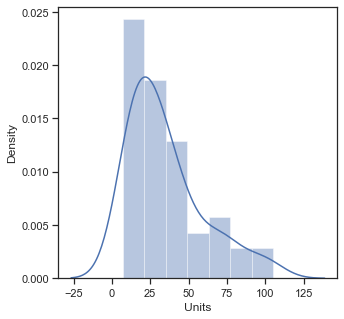

In [13]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.distplot(data['Units'])

### Jointplot 

Комбинация гистограмм и диаграмм рассеивания.

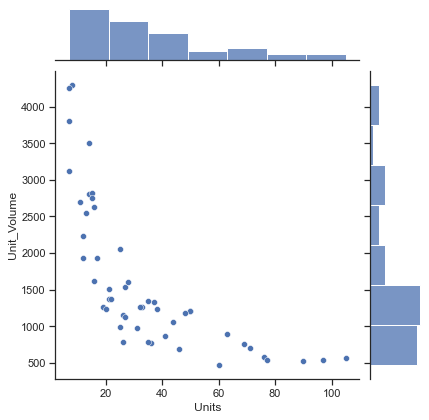

In [14]:
sns.jointplot(x='Units', y='Unit_Volume', data=data)

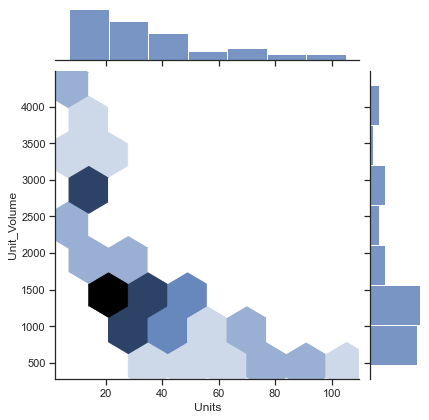

In [15]:
sns.jointplot(x='Units', y='Unit_Volume', data=data, kind="hex")

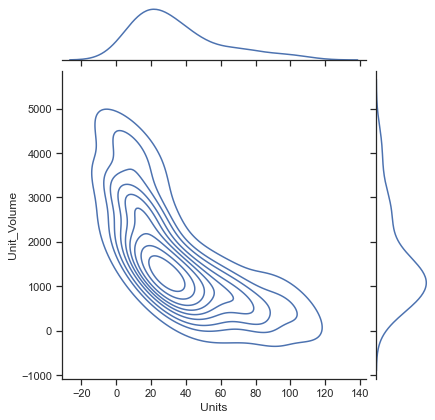

In [16]:
sns.jointplot(x='Units', y='Unit_Volume', data=data, kind="kde")

### "Парные диаграммы" 

Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

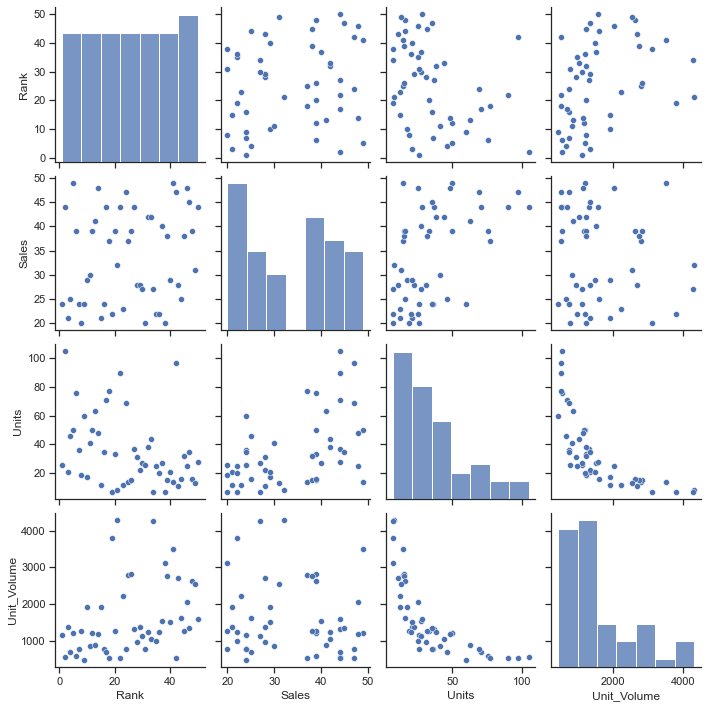

In [17]:
sns.pairplot(data)

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

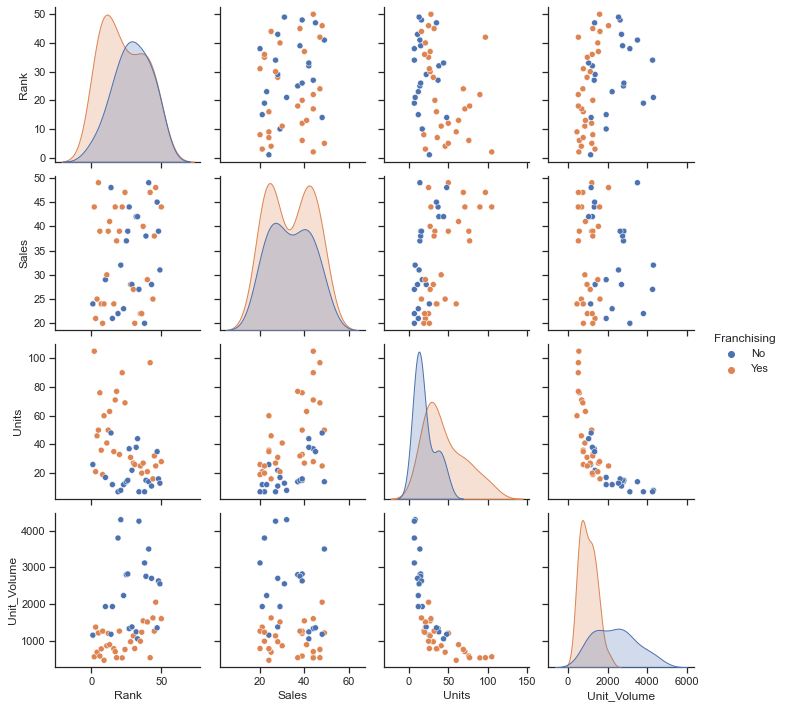

In [18]:
sns.pairplot(data, hue="Franchising")

### [Ящик с усами](https://ru.wikipedia.org/wiki/%D0%AF%D1%89%D0%B8%D0%BA_%D1%81_%D1%83%D1%81%D0%B0%D0%BC%D0%B8)

Отображает одномерное распределение вероятности.

<AxesSubplot:xlabel='Sales'>

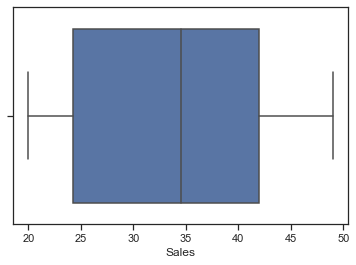

In [19]:
sns.boxplot(x=data['Sales'])

<AxesSubplot:ylabel='Sales'>

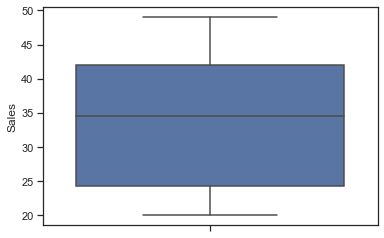

In [20]:
# По вертикали
sns.boxplot(y=data['Sales'])

<AxesSubplot:xlabel='Franchising', ylabel='Sales'>

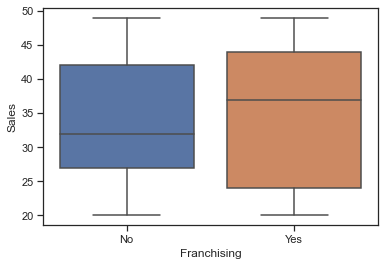

In [21]:
# Распределение параметра Humidity сгруппированные по Occupancy.
sns.boxplot(x='Franchising', y='Sales', data=data)

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)

Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

<AxesSubplot:xlabel='Sales'>

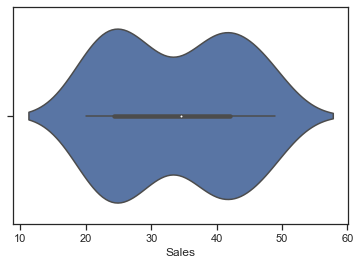

In [22]:
sns.violinplot(x=data['Sales'])

C:\Users\kenia\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sales', ylabel='Density'>

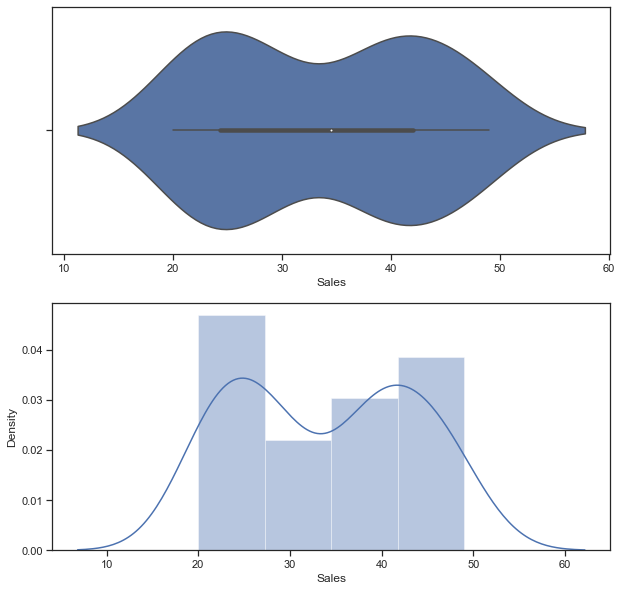

In [23]:
fig, ax = plt.subplots(2, 1, figsize=(10,10))
sns.violinplot(ax=ax[0], x=data['Sales'])
sns.distplot(data['Sales'], ax=ax[1])

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

<AxesSubplot:xlabel='Franchising', ylabel='Sales'>

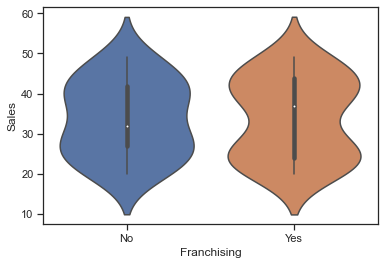

In [24]:
# Распределение параметра Sales сгруппированные по Franchising.
sns.violinplot(x='Franchising', y='Sales', data=data)

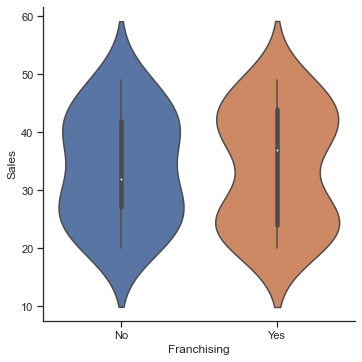

In [25]:
sns.catplot(y='Sales', x='Franchising', data=data, kind="violin", split=True)

## 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:

Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком (в нашем примере это колонка "Franchising"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [26]:
data = pd.read_csv('data/NewFuture50.txt', sep=",")
data.corr()

,Rank,Sales,Units,Unit_Volume,Franchising
Rank,1.000000,0.187535,-0.358137,0.359759,-0.220429
Sales,0.187535,1.000000,0.504153,-0.117048,0.005886
Units,-0.358137,0.504153,1.000000,-0.712994,0.518519
Unit_Volume,0.359759,-0.117048,-0.712994,1.000000,-0.681091
Franchising,-0.220429,0.005886,0.518519,-0.681091,1.000000


Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).

На основе корреляционной матрицы можно сделать следующие выводы:
- Целевой признак наиболее коррелирует с количеством помещений (0.52) и AUV (-0.68). Эти признаки обязательно следует оставить в модели.
- Целевой признак отчасти коррелирует с рейтингом (-0.22). Этот признак стоит также оставить в модели.
- Целевой признак слабо коррелирует с продажами (0.006). Скорее всего этот признак стоит исключить из модели, возможно он только ухудшит качество модели.
- Количество помещений и AUV сильно коррелируют между собой (-0.71). Это неудивительно, ведь AUV зависит от количества помещений. Поэтому из этих признаков в модели можно оставлять только один.
- Также можно сделать вывод, что выбирая из признаков количество помещений и AUV, лучше выбрать AUV, потому что он сильнее коррелирован с целевым признаком. Если линейно зависимые признаки сильно коррелированы с целевым, то оставляют именно тот признак, который коррелирован с целевым сильнее.
Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции Пирсона. Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [27]:
data.corr(method='pearson')

,Rank,Sales,Units,Unit_Volume,Franchising
Rank,1.000000,0.187535,-0.358137,0.359759,-0.220429
Sales,0.187535,1.000000,0.504153,-0.117048,0.005886
Units,-0.358137,0.504153,1.000000,-0.712994,0.518519
Unit_Volume,0.359759,-0.117048,-0.712994,1.000000,-0.681091
Franchising,-0.220429,0.005886,0.518519,-0.681091,1.000000


In [28]:
data.corr(method='kendall')

,Rank,Sales,Units,Unit_Volume,Franchising
Rank,1.000000,0.124762,-0.244566,0.302659,-0.181770
Sales,0.124762,1.000000,0.352038,-0.077511,0.001180
Units,-0.244566,0.352038,1.000000,-0.722866,0.486538
Unit_Volume,0.302659,-0.077511,-0.722866,1.000000,-0.555708
Franchising,-0.181770,0.001180,0.486538,-0.555708,1.000000


In [29]:
data.corr(method='spearman')

,Rank,Sales,Units,Unit_Volume,Franchising
Rank,1.000000,0.189908,-0.376453,0.455864,-0.220429
Sales,0.189908,1.000000,0.502166,-0.115799,0.001406
Units,-0.376453,0.502166,1.000000,-0.893130,0.587072
Unit_Volume,0.455864,-0.115799,-0.893130,1.000000,-0.672616
Franchising,-0.220429,0.001406,0.587072,-0.672616,1.000000


В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен.

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

<AxesSubplot:>

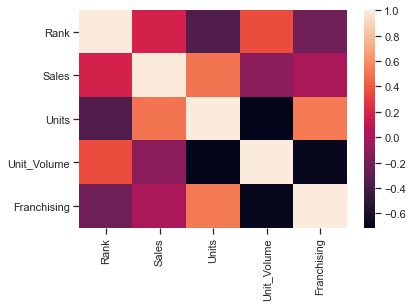

In [30]:
sns.heatmap(data.corr())

<AxesSubplot:>

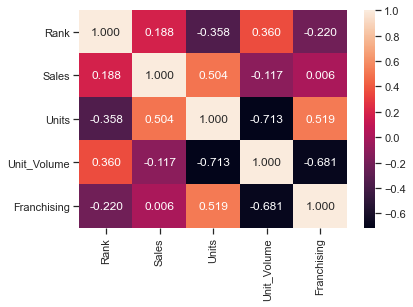

In [31]:
# Вывод значений в ячейках
sns.heatmap(data.corr(), annot=True, fmt='.3f')

<AxesSubplot:>

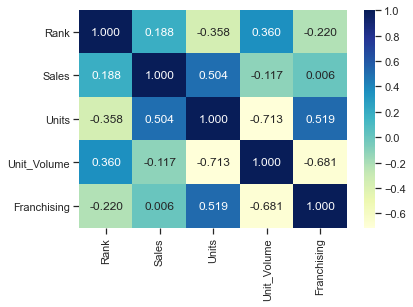

In [32]:
# Изменение цветовой гаммы
sns.heatmap(data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')

<AxesSubplot:>

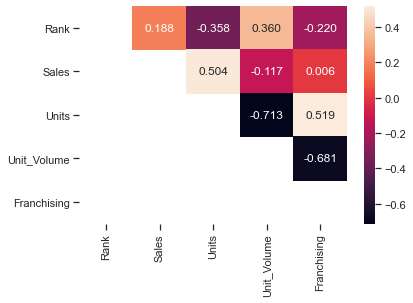

In [33]:
# Треугольный вариант матрицы
mask = np.zeros_like(data.corr(), dtype=np.bool)
# чтобы оставить нижнюю часть матрицы
# mask[np.triu_indices_from(mask)] = True
# чтобы оставить верхнюю часть матрицы
mask[np.tril_indices_from(mask)] = True
sns.heatmap(data.corr(), mask=mask, annot=True, fmt='.3f')

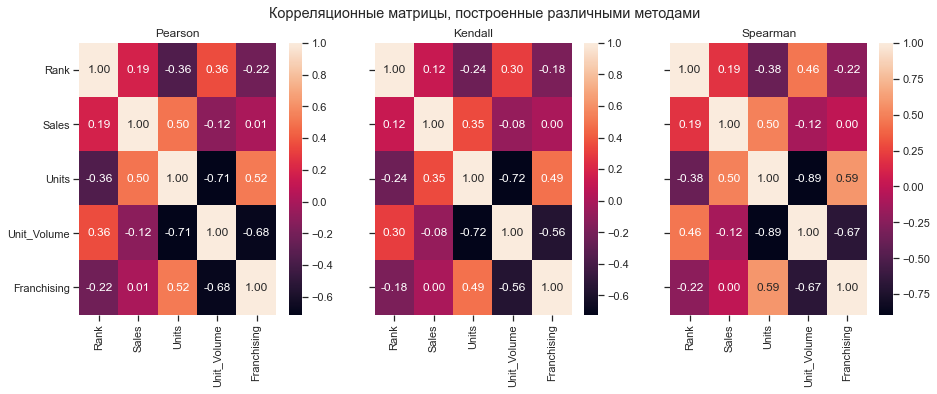

In [34]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.